In [56]:
import pandas as pd

url="./Phishing.csv"
df=pd.read_csv(url)

In [57]:
# Change result instances of -1 to 0
df['Result'].values[df['Result'].values < 0] = 0

# Change all instances of -1 to 0
# df.values[df.values < 0] = 0

In [58]:
# Get Row with a missing value
null_data = df[df.isnull().any(axis=1)]
null_data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result


In [59]:
# Use mean value for any nan values
df.fillna(df.mean(), inplace=True)

In [60]:
from sklearn.model_selection import train_test_split

# split data up into training and test data
x = df.iloc[:,0:30].values.astype(int)
y = df.iloc[:,30].values.astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [61]:
import numpy as np

# Fix the random seed
np.random.seed(7)

# Serialize the numpy arrays
#np.save("X_train.npy", x_train), np.save("y_train.npy", y_train)
#np.save("X_test.npy", x_train), np.save("y_test.npy", y_train)

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [62]:
target = df.pop('Result')
target

#dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

0        0
1        0
2        0
3        0
4        1
        ..
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

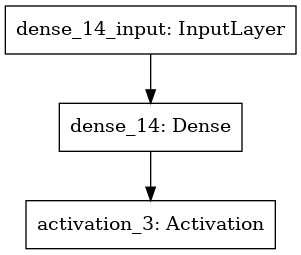

In [63]:
import tensorflow as tf
import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_dim=784))
model.add(keras.layers.Activation('relu'))

keras.utils.plot_model(model, to_file='model.png')